<a href="https://colab.research.google.com/github/GulfamMalik6/ANPR/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip3 install torch torchvision torchaudio
!pip install easyocr

In [74]:
# Import the necessary libraries
import easyocr  # Import the EasyOCR library for text recognition
import cv2      # Import OpenCV for image processing
import numpy as np  # Import numpy for numerical operations
from matplotlib import pyplot as plt  # Import Matplotlib for image visualization

In [80]:
# Specify the language for text recognition (English in this case)
selected_language = ['en']

# Create an EasyOCR Reader object configured for English text recognition
reader = easyocr.Reader(selected_language)

# Define the path to the image you want to process
IMAGE_PATH = "/DSC_1047.JPG"

# Use the Reader object to perform text recognition on the image
result = reader.readtext(IMAGE_PATH)

# The 'result' variable now contains information about the detected text in the image

# Display or process the detected text results
for detection in result:
    # Extract the detected text from the result
    detected_text = detection[1]

    # You can perform actions with the detected text here
    # For example, print it to the console
    print(f"Detected Text: ",(result))

# The 'result' variable can be used for further processing or analysis of the detected text


Detected Text:  [([[1028, 774], [1122, 774], [1122, 828], [1028, 828]], 'FDA', 0.9993430205502506), ([[1143, 785], [1183, 785], [1183, 825], [1143, 825]], '09 ', 0.9416877065635325), ([[1012, 824], [1134, 824], [1134, 878], [1012, 878]], '1966', 0.9998656526569555)]
Detected Text:  [([[1028, 774], [1122, 774], [1122, 828], [1028, 828]], 'FDA', 0.9993430205502506), ([[1143, 785], [1183, 785], [1183, 825], [1143, 825]], '09 ', 0.9416877065635325), ([[1012, 824], [1134, 824], [1134, 878], [1012, 878]], '1966', 0.9998656526569555)]
Detected Text:  [([[1028, 774], [1122, 774], [1122, 828], [1028, 828]], 'FDA', 0.9993430205502506), ([[1143, 785], [1183, 785], [1183, 825], [1143, 825]], '09 ', 0.9416877065635325), ([[1012, 824], [1134, 824], [1134, 878], [1012, 878]], '1966', 0.9998656526569555)]


In [81]:
# Extract the coordinates of the top-left and bottom-right corners of the bounding box
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])

# Extract the detected text from the result
text = result[0][1]

# Define a font type for rendering text (FONT_HERSHEY_SIMPLEX is one option)
font = cv2.FONT_HERSHEY_SIMPLEX

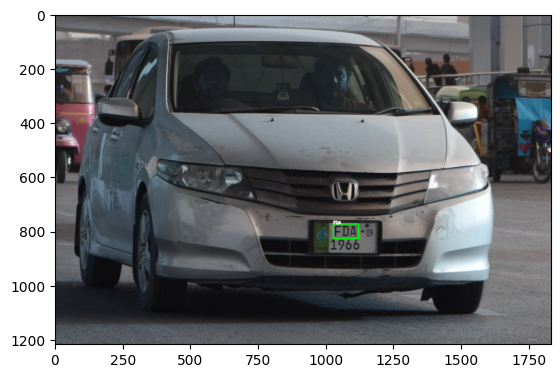

In [82]:
# Load the image from the specified path
img = cv2.imread(IMAGE_PATH)

# Draw a green rectangle around the detected text
# 'top_left' and 'bottom_right' define the corners of the rectangle
# (0, 255, 0) specifies the color (green in BGR format)
# 3 is the thickness of the rectangle border
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

# Add the detected text to the image
# 'text' is the text content to be added
# 'top_left' specifies the starting position for the text
# 'font' specifies the font type
# 0.5 is the font scale (size)
# (255, 255, 255) specifies the text color (white in BGR format)
# 2 is the thickness of the text stroke
# cv2.LINE_AA is used for anti-aliased (smooth) text rendering
img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

# Display the image with the rectangle and text
plt.imshow(img)
plt.show()


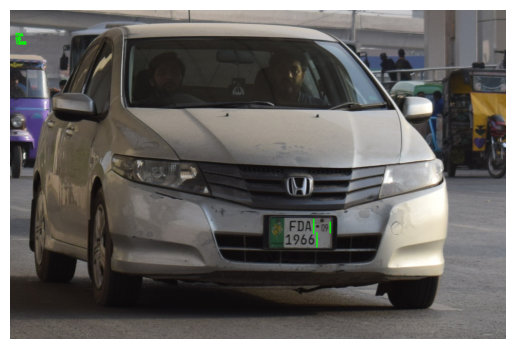

In [83]:
import cv2
import matplotlib.pyplot as plt

# Load the image from IMAGE_PATH
img = cv2.imread(IMAGE_PATH)

# Initialize a spacer variable for vertical text placement
spacer = 100

# Loop through the detected results
for detection in result:
    # Get the coordinates of the top-left and bottom-right corners of the bounding box
    top_left = tuple(detection[0][1])
    bottom_right = tuple(detection[0][2])

    # Extract the detected text from the result
    text = detection[1]

    # Draw a green rectangle around the detected object on the image
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 4)

    # Place the detected text just below the rectangle
    # You can adjust the text position here if needed
    text_position = (20, spacer)

    # Add the detected text to the image
    img = cv2.putText(img, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Increase the spacer for the next detected text placement
    spacer += 15

# Convert the BGR image to RGB format for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with detected objects
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()


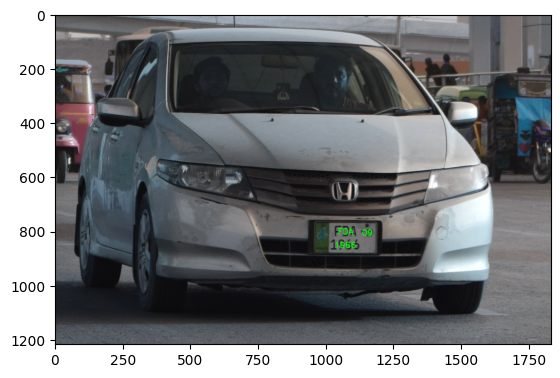

Detected Text 1: FDA
Detected Text 2: 09 
Detected Text 3: 1966


In [84]:
# Load the image from the specified path
img = cv2.imread(IMAGE_PATH)

# Define font properties for text annotation
font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
font_scale = 1.0                # Font scale (size)
font_thickness = 2              # Font thickness

# Create a list to store the detected texts
detected_texts = []

# Iterate through each detected text in the result
for detection in result:
    # Extract the coordinates of the top-left and bottom-right corners of the bounding box
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])

    # Extract the detected text
    text = detection[1]

    # Calculate the text width and position for centering
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_width = text_size[0]
    text_height = text_size[1]
    text_x = (top_left[0] + bottom_right[0] - text_width) // 2
    text_y = (top_left[1] + bottom_right[1] + text_height) // 2

    # Draw the detected text on the image
    img = cv2.putText(img, text, (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA)

    # Append the detected text to the list
    detected_texts.append(text)

# Display the image with the detected text
plt.imshow(img)
plt.show()

# Print the detected texts to the console
for i, text in enumerate(detected_texts):
    print(f"Detected Text {i + 1}: {text}")
